### 1. Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                   names=['Type','Alcohol','Malic acid','Ash',
                          'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','Nonflavanoids phenols','Proanthocyanins',                                
                          'Color intensify','Hue','OD280/OD315 of diluted wines','Proline'])

### 2. EDA

In [ ]:
data.tail()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoids phenols         178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensify               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
data.isna().sum()

Type                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoids phenols           0
Proanthocyanins                 0
Color intensify                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
data.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 3. Data Visualization

2    71
1    59
3    48
Name: Type, dtype: int64


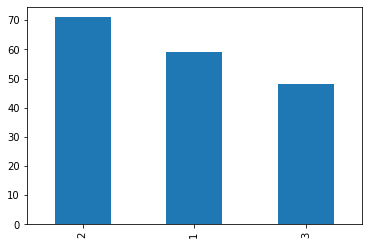

In [ ]:
print(data.Type.value_counts())
data.Type.value_counts().plot(kind='bar')
plt.show()

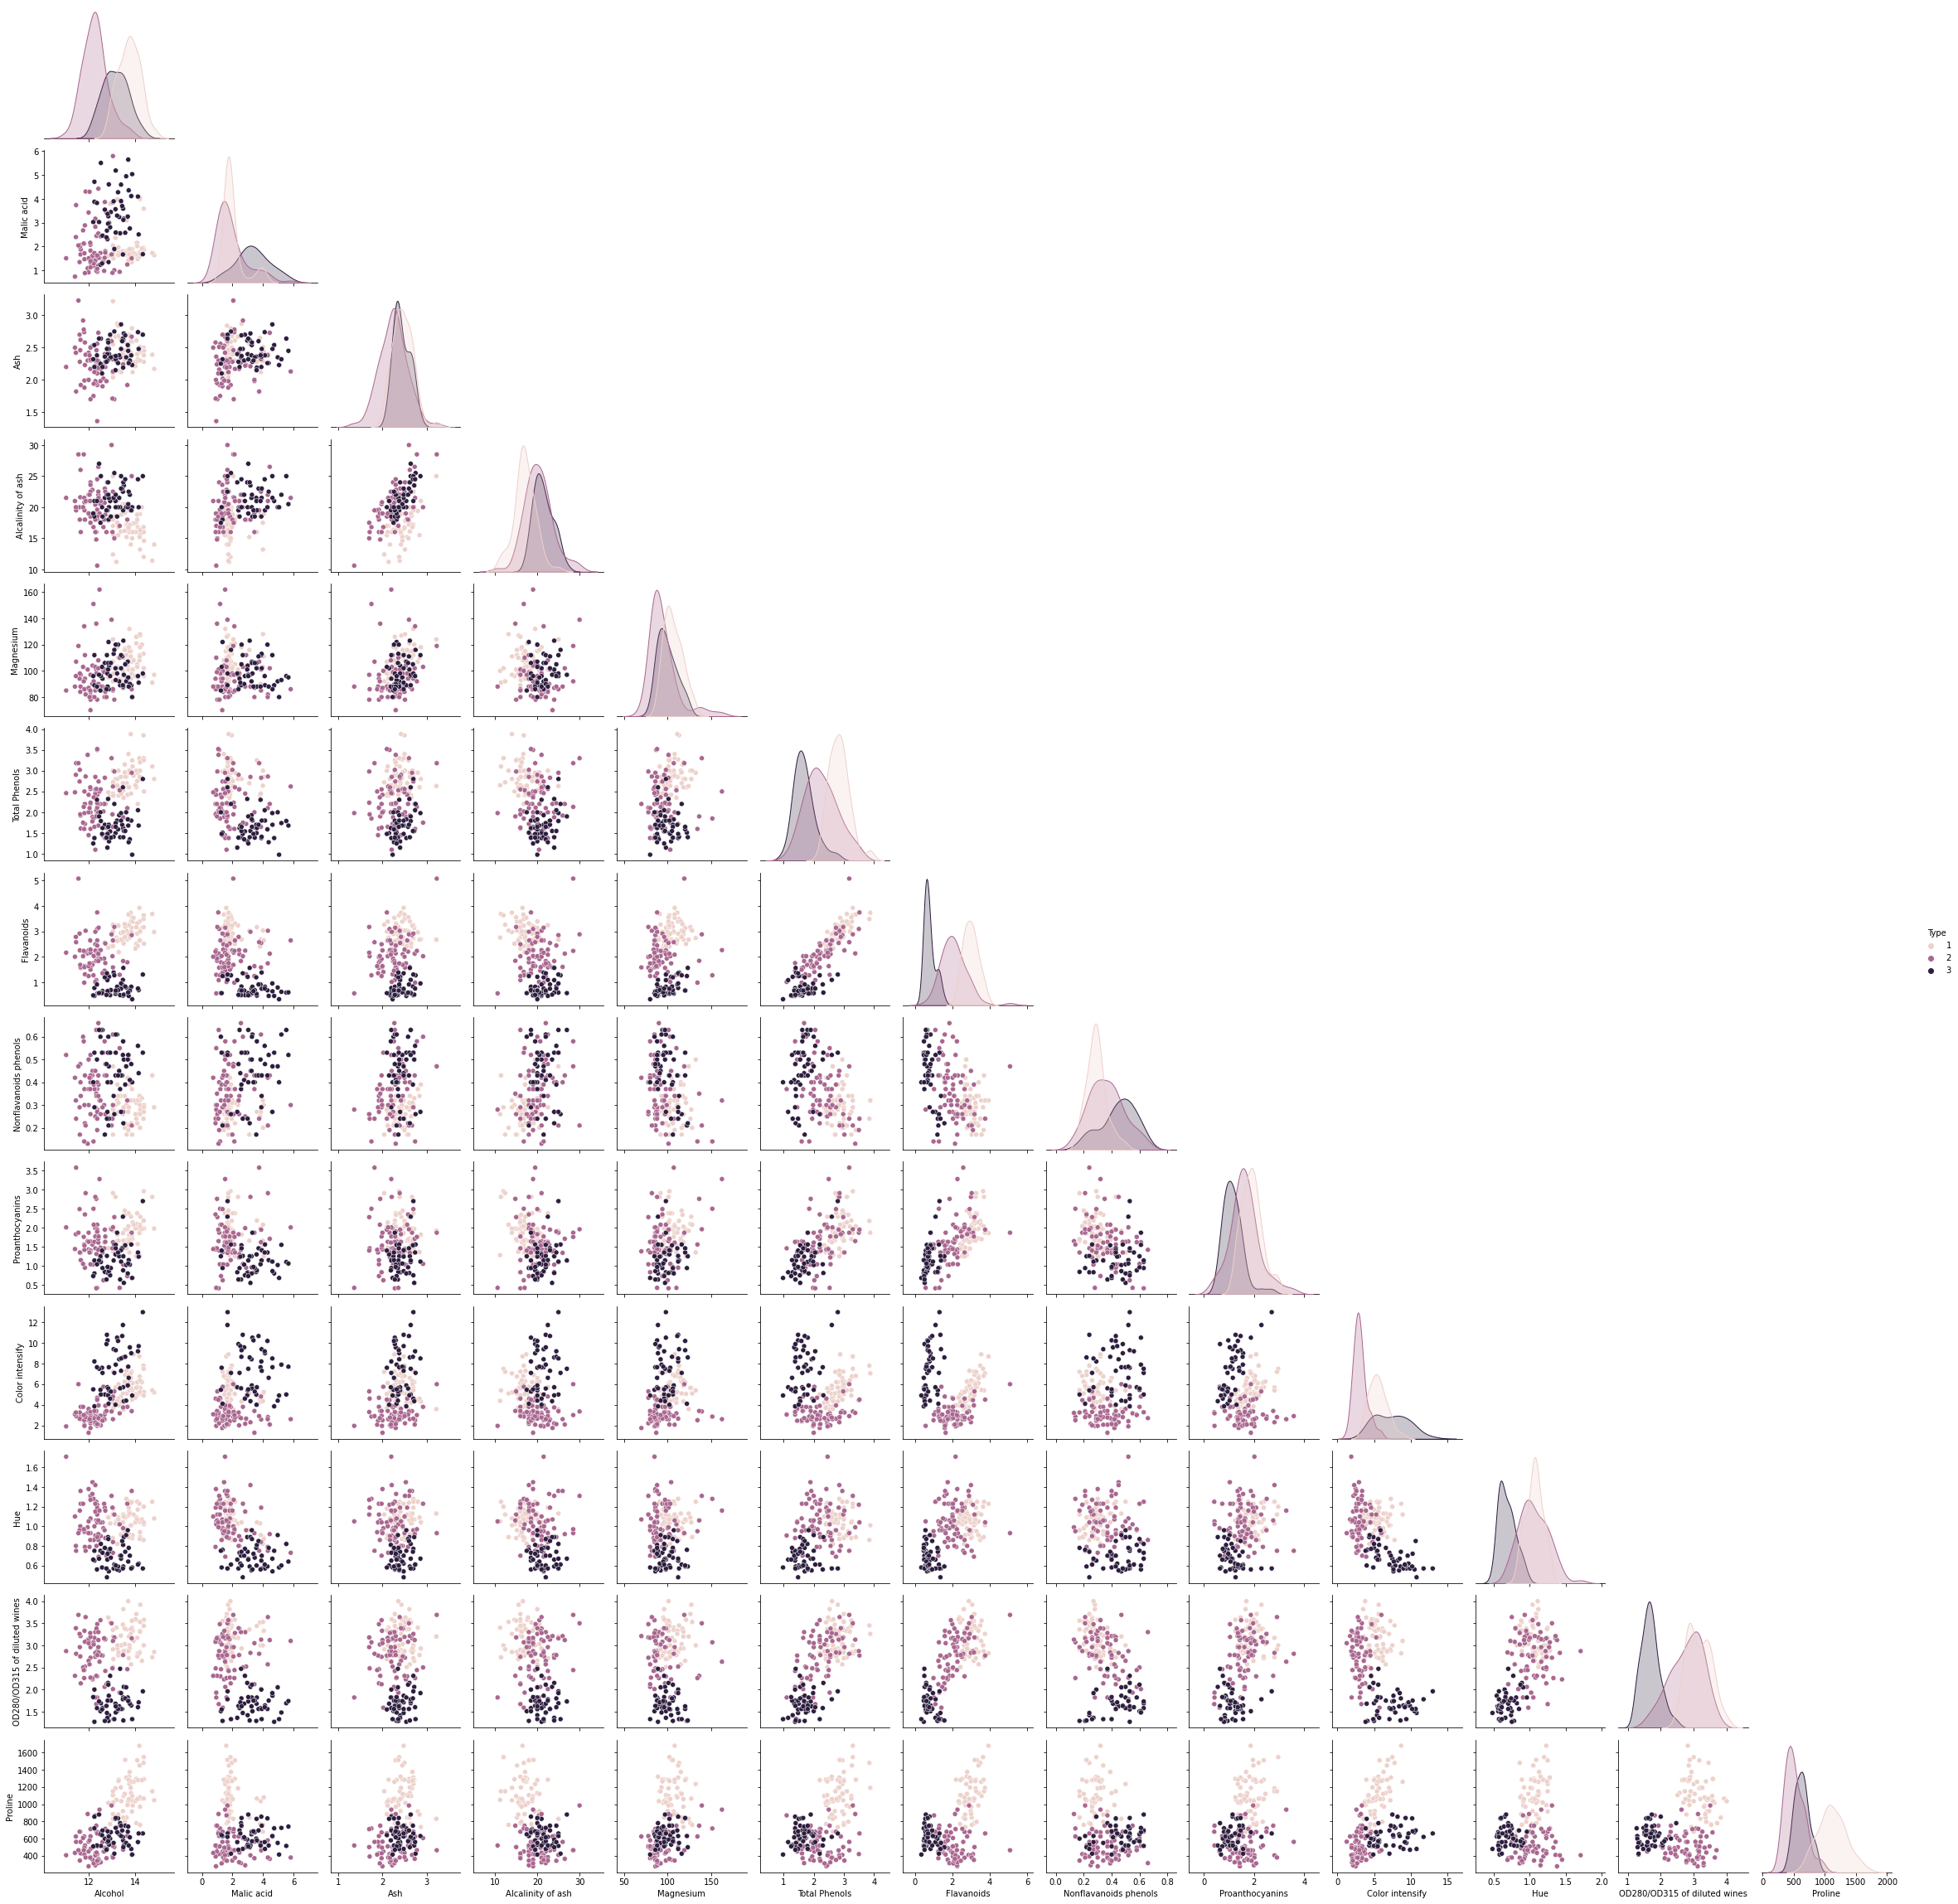

In [ ]:
sns.pairplot(data, hue='Type', corner = True)
plt.show()

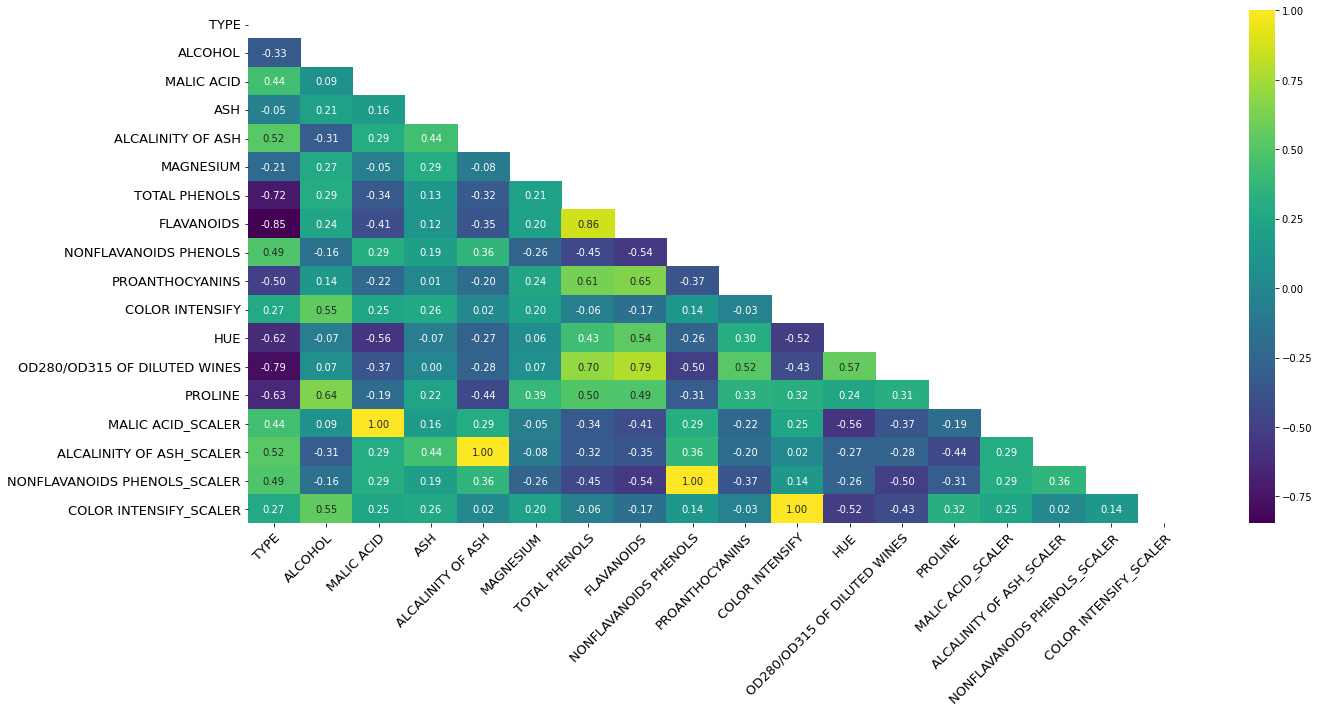

In [ ]:
corr = data.corr()

fig, ax = plt.subplots(figsize = (20,10))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot = True, fmt = ".2f", mask = mask, color = 'blue', cmap = 'viridis');

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]

ax.set_yticklabels(yticks, rotation = 0, fontsize = 13, color = 'black');
ax.set_xticklabels(xticks, rotation = 45, fontsize = 13, color = 'black', ha = 'right', rotation_mode = 'anchor');

plt.tight_layout()

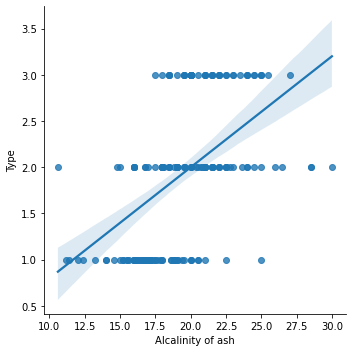

In [ ]:
sns.lmplot(data = data, x = 'Alcalinity of ash', y = 'Type', fit_reg=True);

### 4. Preprocessing - Extract Features

In [ ]:
# đưa các feature cần normalize vào 1 list
feat_scaler = ['Malic acid', 'Alcalinity of ash', 'Nonflavanoids phenols', 'Color intensify']
# dùng min max normalize
for feat in feat_scaler: 
  data[feat+'_scaler']=data[feat]/data[feat].max()
data.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline,Malic acid_scaler,Alcalinity of ash_scaler,Nonflavanoids phenols_scaler,Color intensify_scaler
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.294828,0.520000,0.424242,0.433846
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0.306897,0.373333,0.393939,0.336923
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0.406897,0.620000,0.454545,0.436923
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.336207,0.560000,0.363636,0.600000
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0.446552,0.700000,0.590909,0.332308


In [ ]:
X = data.drop("Type", axis = 1)
y = data["Type"]

In [ ]:
from scipy import stats

for feat in X.columns:
  print("Feature", feat, ':')
  pearson_coef, p_value = stats.pearsonr(X[feat],y)
  print("Correlation Coefficient is:", pearson_coef, "while P_value is:", p_value )

Feature Alcohol :
Correlation Coefficient is: -0.32822194089001927 while P_value is: 7.723253314615735e-06
Feature Malic acid :
Correlation Coefficient is: 0.437776204841065 while P_value is: 9.917703256896814e-10
Feature Ash :
Correlation Coefficient is: -0.04964322102407742 while P_value is: 0.510497749646042
Feature Alcalinity of ash :
Correlation Coefficient is: 0.517859109821452 while P_value is: 1.3353947853311075e-13
Feature Magnesium :
Correlation Coefficient is: -0.2091793902949302 while P_value is: 0.005075415772106815
Feature Total Phenols :
Correlation Coefficient is: -0.7191633405539716 while P_value is: 1.2340511416926586e-29
Feature Flavanoids :
Correlation Coefficient is: -0.8474975401417584 while P_value is: 2.736652261700284e-50
Feature Nonflavanoids phenols :
Correlation Coefficient is: 0.48910915886069084 while P_value is: 4.286739039763896e-12
Feature Proanthocyanins :
Correlation Coefficient is: -0.4991298238591705 while P_value is: 1.3272509181441725e-12
Feature 

In [ ]:
features = ['Magnesium', 'Color intensify', 'Color intensify_scaler']
X_tomodel = X[features]
X_tomodel

,Magnesium,Color intensify,Color intensify_scaler
0,127,5.64,0.433846
1,100,4.38,0.336923
2,101,5.68,0.436923
3,113,7.80,0.600000
4,118,4.32,0.332308
...,...,...,...
173,95,7.70,0.592308
174,102,7.30,0.561538
175,120,10.20,0.784615
176,120,9.30,0.715385


### 5. Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tomodel, y, test_size= 0.2, random_state = 0)

In [ ]:
# Decision Tree Classifier
dtr_model = DecisionTreeClassifier()
dtr_model.fit(X_train, y_train)
dtr_pred = dtr_model.predict(X_test)
print(classification_report(y_test, dtr_pred))
print('Mean Absolute Error using Decision Tree Classifier:',mean_absolute_error(y_test, dtr_pred))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.69      0.76        16
           3       0.57      0.67      0.62         6

    accuracy                           0.75        36
   macro avg       0.72      0.74      0.72        36
weighted avg       0.76      0.75      0.75        36

Mean Absolute Error using Decision Tree Classifier: 0.3055555555555556


In [ ]:
# Random Forest
forest_model = RandomForestRegressor(n_estimators = 200, random_state = 0)
forest_model.fit(X_train, y_train)
rdf_pred = forest_model.predict(X_test)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(y_test, rdf_pred))

Mean Absolute Error using Random Forest: 0.3993055555555556


In [ ]:
# Hệ số k
k = round(np.sqrt(len(data))/2, 0) 
print(k)

7.0


In [ ]:
# K-NN
knn_model = KNeighborsRegressor(n_neighbors=int(k))
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("Mean Absolute Error using K-NN Regression:", mean_absolute_error(y_test, knn_pred))

Mean Absolute Error using K-NN Regression: 0.4841269841269841


In [ ]:
list_k = []
knn_list_mae = []

for k_value in range(1,10):
    list_k.append(k_value)
    KNN_model = KNeighborsRegressor(n_neighbors = k_value)
    KNN_model.fit(X_train, y_train)
    y_pred = KNN_model.predict(X_test)
    mae = mean_absolute_error(y_pred, y_test)
    print('MSE of model KNN that has k_value:', k_value, 'is:', mae)
    knn_list_mae.append(mae)
index_min_mse = knn_list_mae.index(min(knn_list_mae))
k_min = list_k[index_min_mse]

print('k_value:', k_min)

MSE of model KNN that has k_value: 1 is: 0.5277777777777778
MSE of model KNN that has k_value: 2 is: 0.4027777777777778
MSE of model KNN that has k_value: 3 is: 0.3981481481481482
MSE of model KNN that has k_value: 4 is: 0.4375
MSE of model KNN that has k_value: 5 is: 0.43333333333333335
MSE of model KNN that has k_value: 6 is: 0.462962962962963
MSE of model KNN that has k_value: 7 is: 0.4841269841269841
MSE of model KNN that has k_value: 8 is: 0.4756944444444444
MSE of model KNN that has k_value: 9 is: 0.5
k_value: 3


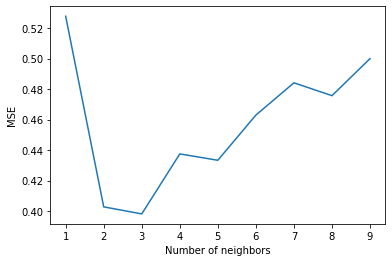

In [ ]:
plt.plot(list_k, knn_list_mae)
plt.ylabel('MSE')
plt.xlabel('Number of neighbors')
plt.show()

=> Choose k_neighbor = 3

### 6. Save model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_model = KNN_model

import pickle as cPickle
import os
with open('/content/drive/MyDrive/MindX/Khoá 3/DA14 - Nhóm 4/Mid term test/Quyen-KNN_model.pkl', 'wb') as f:
    cPickle.dump(save_model, f)
print('Save model')

Save model


## Extra :

### Predict Cooling and Heating Loads using Multivariate Regression


### 1. Loading Dataset + EDA

In [ ]:
df2 = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',names=["Relative Compactness","Surface Area","Wall Area","Roof Area",
                                                   "Overall Height","Orientation","Glazing Area","Glazing Area Distribution",
                                                  "Heating Load","Cooling Load"])

In [ ]:
df2.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df2.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

### 2. Data Visualization

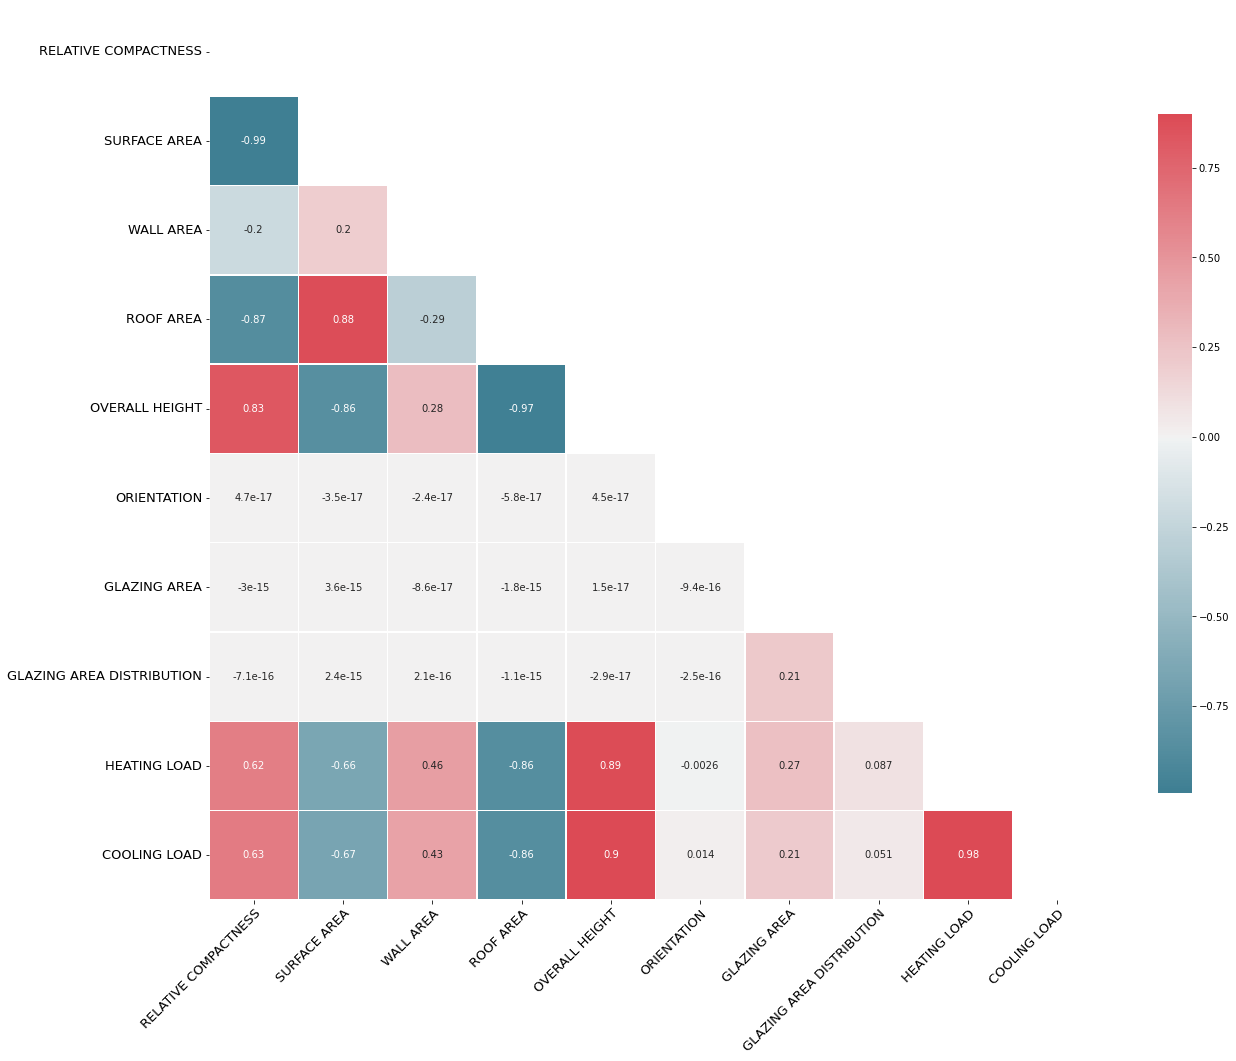

In [ ]:
corr2 = df2.corr()

f, ax = plt.subplots(figsize=(20, 25))

mask = np.zeros_like(corr2, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr2, mask = mask, cmap = cmap, vmax = .9,
            center = 0, square = True, linewidths = .5, 
            annot = True, cbar_kws = {"shrink": .5})

yticks = [i.upper() for i in corr2.index]
xticks = [i.upper() for i in corr2.columns]

ax.set_yticklabels(yticks, rotation = 0, fontsize = 13, color = 'black');
ax.set_xticklabels(xticks, rotation = 45, fontsize = 13, color = 'black', ha = 'right', rotation_mode = 'anchor');

plt.show()

### 3. Preprocessing and Building model

In [ ]:
x2 = df2.drop(['Heating Load','Cooling Load'], axis = 1)
y2 = df2[['Heating Load']]

In [ ]:
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)
x2 = nr.fit_transform(x2)

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(x2, y2, test_size = 0.2, random_state = 99)

In [ ]:
model_lnrg = LinearRegression()
model_lnrg.fit(a_train, b_train)
lnrg_pred = model_lnrg.predict(a_test)

print('Coefficients:', model_lnrg.coef_)
print('------')
print('Intercept:', model_lnrg.intercept_)
print('------')
print('Mean squared error (MSE): %.2f' % mean_squared_error(b_test, lnrg_pred))
print('------')
print('Coefficient of determination (R^2): %.2f' % r2_score(b_test, lnrg_pred))

Coefficients: [[-2.97366269e+04  2.20662255e+12 -2.20662255e+12 -4.41324510e+12
   4.40529982e+03  4.01124573e+00  1.56104573e+04  1.60406689e+02]]
------
Intercept: [373.62710537]
------
Mean squared error (MSE): 8.42
------
Coefficient of determination (R^2): 0.92
